In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# 데이터 로드
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

# 60000:이미지 갯수
# 28x28:이미지 Size (28x28개의 pixels로 구성)

(60000, 28, 28)

In [4]:
train_images[0] # 첫번째 이미지, 255 =  white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# 시각화를 위한 패키지
import matplotlib.pyplot as plt

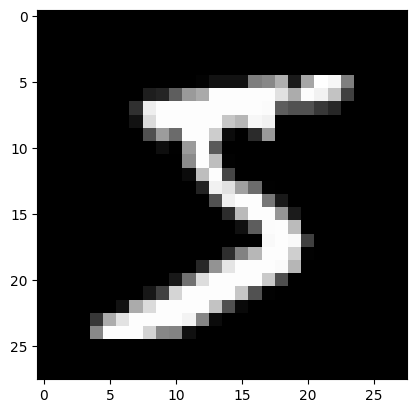

In [6]:
plt.imshow(train_images[0], cmap='gray') # cmap='gray' cmap = Color Map,   'gray' = 그레이스케일(흑백)
       # 픽셀 값이 낮을수록(vmin=0) 검은색, 높을수록(vmax=255) 밝은색(흰색)으로 매핑(표시)
plt.show()

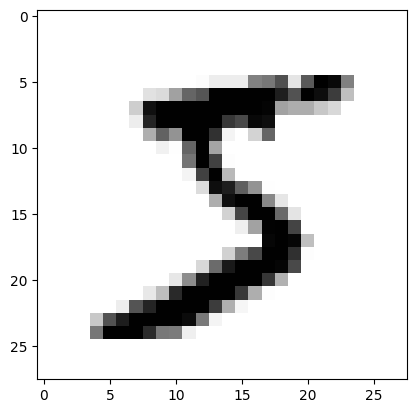

In [7]:
plt.imshow(train_images[0], cmap='gray_r') # cmap='gray_r', vmin=0, vmax=255  # r "reverse", 색상 맵의 색상 순서 반전
plt.show()

In [8]:
train_labels[0]
# 레이블 확인 -> 5

5

# 신경망 설계

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
model = models.Sequential()
# Sequential 클래스 생성자를 통해 객체(객체명 model) 생성
# 이 기본 network안에 layer 추가

In [11]:
# 신경망 구조
# hidden layer 수 =1
# hidden layer의 node 수 = 512
# relu 활성화 함수
# 28x28개의 input ....... (input_shape <- 입력 node의 수)

model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))

In [12]:
# Output layer
# 노드수: 10개( = class 수)
# 활성화함수: softmax

model.add(layers.Dense(10, activation = 'softmax'))

In [13]:
model.summary()
# (512*28*28) + 512
# 513 * 10


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
#### flatten
# input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [16]:
train_images.shape

(60000, 784)

In [17]:
# Input scaling
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [18]:
from tensorflow.keras.utils import to_categorical

# 종속변수값 0~9
# one-hot 인코딩
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [19]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
test_labels.shape

(10000,)

In [21]:
test_labels_one_hot.shape

(10000, 10)

In [22]:
train_labels[0]

5

In [23]:
train_labels_one_hot[0] # one-hot vector ... 6번째 값(즉 5)만 1

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

옵티마이져: rmsprop <br>
비용함수: categorical_crossentropy

In [24]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001) # lr값.. 0.001

In [25]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',   # cf binary_crossentropy
               metrics=['accuracy']) # 모형의 성능을 'accuracy'로 판단
                                     # accuracy : 전체 중 정확히 예측한 값의 비율

In [26]:
# 모델 학습 and 내용 history에 저장
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)
  # fit() 함수를 통해서 학습
  # epochs: 전체의 학습 데이터의 사용 횟수 지정
  # batch_size: 한번의 학습에 사용되는 data record 갯수 (weight 업데이트)


Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.2530 - accuracy: 0.9263
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1029 - accuracy: 0.9707
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0677 - accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0496 - accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0288 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0222 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0174 - accuracy: 0.9946
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0102 - accuracy: 0.9971

In [27]:
# 모델 평가
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9821


[0.07153905928134918, 0.9821000099182129]

## 예측하기

In [28]:
model.predict(test_images[0:1])
  # 모델이 input 타입으로 요청하는 배치 차원을 가진 데이터 형식((1, 28, 28) 형태의 3차원 배열)으로 파라메터 전달
    # 1: 배치 크기,  처리할 이미지의 수
    # 28 : 높이(rows), 이미지 세로 픽셀
    # 28 : 너비(cols), 이미지의 가로 픽셀

1/1 [==============================] - 0s 80ms/step


array([[7.4181786e-11, 2.8287190e-15, 1.0122647e-08, 1.4115208e-06,
        8.0469009e-16, 3.1156414e-11, 3.1017621e-18, 9.9999857e-01,
        1.3994473e-11, 4.5215035e-08]], dtype=float32)

In [29]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
model.predict(test_images[0:1])

1/1 [==============================] - 0s 25ms/step


array([[0.0000000001, 0.          , 0.0000000101, 0.0000014115,
        0.          , 0.          , 0.          , 0.99999857  ,
        0.          , 0.0000000452]], dtype=float32)

In [30]:
test_labels[0]

7

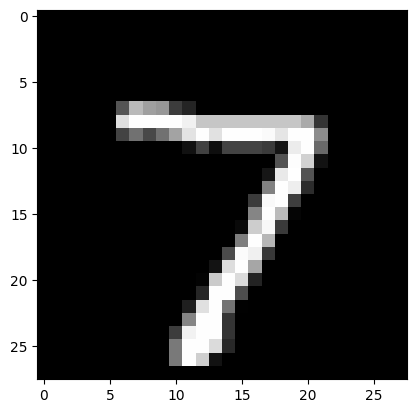

In [31]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.show()

## Confusion matrix 확인하기

In [32]:
y_preds_prob = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [33]:
y_preds_prob.shape

(10000, 10)

In [34]:
y_preds = np.argmax(y_preds_prob, axis=1)

In [35]:
y_preds.shape

(10000,)

In [36]:
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
confusion_matrix(test_labels, y_preds)

array([[ 973,    0,    0,    1,    1,    0,    2,    1,    2,    0],
       [   0, 1129,    1,    1,    0,    1,    1,    1,    1,    0],
       [   1,    4, 1011,    0,    1,    0,    3,    5,    6,    1],
       [   0,    0,    3,  992,    0,    3,    0,    4,    1,    7],
       [   3,    0,    3,    1,  959,    0,    4,    3,    1,    8],
       [   2,    0,    0,    8,    1,  871,    2,    2,    3,    3],
       [   4,    3,    0,    1,    2,    7,  941,    0,    0,    0],
       [   0,    6,    8,    1,    0,    0,    0, 1004,    1,    8],
       [   2,    0,    3,    4,    4,    4,    2,    3,  947,    5],
       [   0,    2,    0,    4,    3,    0,    1,    5,    0,  994]],
      dtype=int64)

In [39]:
print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 비용함수값 확인하기

In [40]:
import matplotlib.pyplot as plt

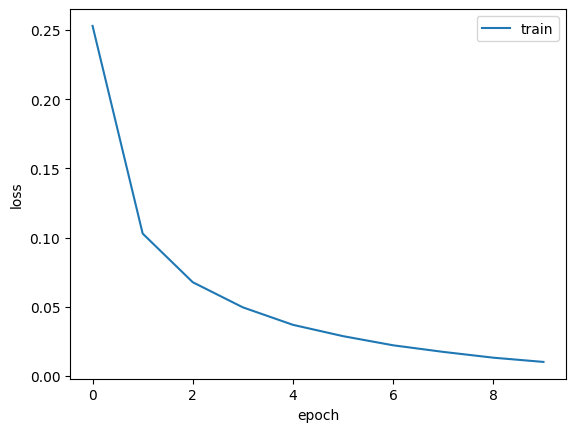

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# Accuracy 확인하기

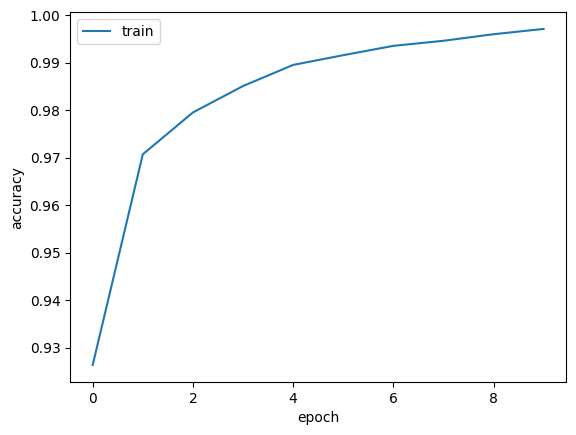

In [42]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

# 새로운 입력데이터(다운로드 받은 이미지)를 통해 예측 수행

In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_new_image(img_path):
    # 사이즈 조정 (모델 훈련 인풋에 맞춤)
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    # numpy 배열로 변환.
    img_tensor = image.img_to_array(img)
    # 정규화(0-1)
    img_tensor = img_tensor.astype('float32') / 255.0
    # flattening(평탄화)
    img_tensor = img_tensor.reshape((1, 28*28))

    # 모델을 이용, 입력이미지의 숫자 예측
    prediction = model.predict(img_tensor)
    # 예측된(가장 높은 확률을 가진 클래스) 숫자반환
    digit = np.argmax(prediction)
    return digit



In [45]:
# 새로운 이미지 파일 경로
img_path ='classification/4.PNG'
predicted_digit = predict_new_image(img_path)
print(f'Predicted digit: {predicted_digit}')

1/1 [==============================] - 0s 22ms/step
Predicted digit: 2


##  model 확장

In [46]:
model_ext = models.Sequential()
model_ext.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model_ext.add(layers.Dense(128, activation = 'relu'))
model_ext.add(layers.Dense(10, activation = 'softmax'))

In [47]:
model_ext.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [48]:
rmsprop = optimizers.RMSprop(lr=0.001)
model_ext.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

c:\Users\crazy\miniconda3\envs\tf-gpu\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [49]:
model_ext.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2367 - accuracy: 0.9287
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0879 - accuracy: 0.9734
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0572 - accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0098 - accuracy: 0.9970

In [50]:
model_ext.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.1167 - accuracy: 0.9804


[0.11671138554811478, 0.980400025844574]

In [51]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_new_image_ext(img_path):
    # 이미지 파일을 로드
    # 사이즈를 조정 (모델 훈련 인풋에 맞춤)
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    # 이미지를 numpy 배열로 변환.
    img_tensor = image.img_to_array(img)
    # 값의 범위를 0-1 사이로 정규화.
    img_tensor = img_tensor.astype('float32') / 255.0
    # 이미지를 모델의 입력 형태에 맞게 평탄화.
    img_tensor = img_tensor.reshape((1, 28*28))

    # 모델을 사용하여 이미지의 숫자 예측.
    prediction = model_ext.predict(img_tensor)
    # 가장 높은 확률을 가진 클래스(숫자)를 반환.
    digit = np.argmax(prediction)
    return digit


In [54]:
# 새로운 이미지 파일 경로
img_path ='classification/5_1.JPG'
predicted_digit = predict_new_image_ext(img_path)
print(f'Predicted digit: {predicted_digit}')

1/1 [==============================] - 0s 21ms/step
Predicted digit: 6
